## Ashika Prakash Acharya (axa190084)
### Linear Regression (Melbourne Housing Dataset)


### Read the dataset

In [1]:
options(warn=-1)
options(repr.plot.width=10, repr.plot.height=8)

In [2]:
install.packages("tidyverse")
install.packages("corrplot")
install.packages("Metrics")
library(tidyverse)
library(Metrics)
require("corrplot")


The downloaded binary packages are in
	/var/folders/kn/jtmjzb3938740xmg3c8dtmkc0000gn/T//RtmpOHDVNJ/downloaded_packages

The downloaded binary packages are in
	/var/folders/kn/jtmjzb3938740xmg3c8dtmkc0000gn/T//RtmpOHDVNJ/downloaded_packages

The downloaded binary packages are in
	/var/folders/kn/jtmjzb3938740xmg3c8dtmkc0000gn/T//RtmpOHDVNJ/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: corrplot

corrplot 0.84 loaded



In [3]:
housing = read.csv("https://personal.utdallas.edu/~axa190084/Melbourne_housing_FULL.csv", stringsAsFactors = FALSE, quote = "")

In [4]:
head(housing)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Abbotsford,68 Studley St,2,h,NA,SS,Jellis,3/09/2016,2.5,3067,⋯,1,1,126,NA,NA,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
2,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,⋯,1,1,202,NA,NA,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
3,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,⋯,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
4,Abbotsford,18/659 Victoria St,3,u,NA,VB,Rounds,4/02/2016,2.5,3067,⋯,2,1,0,NA,NA,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
5,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,⋯,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
6,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,⋯,2,1,94,NA,NA,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019


In [5]:
dim(housing)

[1] 34790    21

### Eliminate records that do not have price value.

In [6]:
clean_housing = housing
clean_housing <- clean_housing %>% filter(Price != "") 
dim(clean_housing)

[1] 27194    21

In [7]:
# code mutation to be able to see corelation between these features.

clean_housing$Rooms =  as.numeric(clean_housing$Rooms)
clean_housing$Price =  as.numeric(clean_housing$Price)
clean_housing$Distance = as.numeric(clean_housing$Distance)
clean_housing$Bathroom = as.numeric(clean_housing$Bathroom)
clean_housing$Car = as.numeric(clean_housing$Car)
clean_housing$Landsize = as.numeric(clean_housing$Landsize)
clean_housing$Longtitude = as.numeric(clean_housing$Longtitude)
clean_housing$BuildingArea = as.numeric(clean_housing$BuildingArea)
clean_housing$Propertycount = as.numeric(clean_housing$Propertycount)
clean_housing$Postcode <- as.numeric(clean_housing$Postcode)

### Some interesting finds and plots to support them

### Let us see when the houses were built.

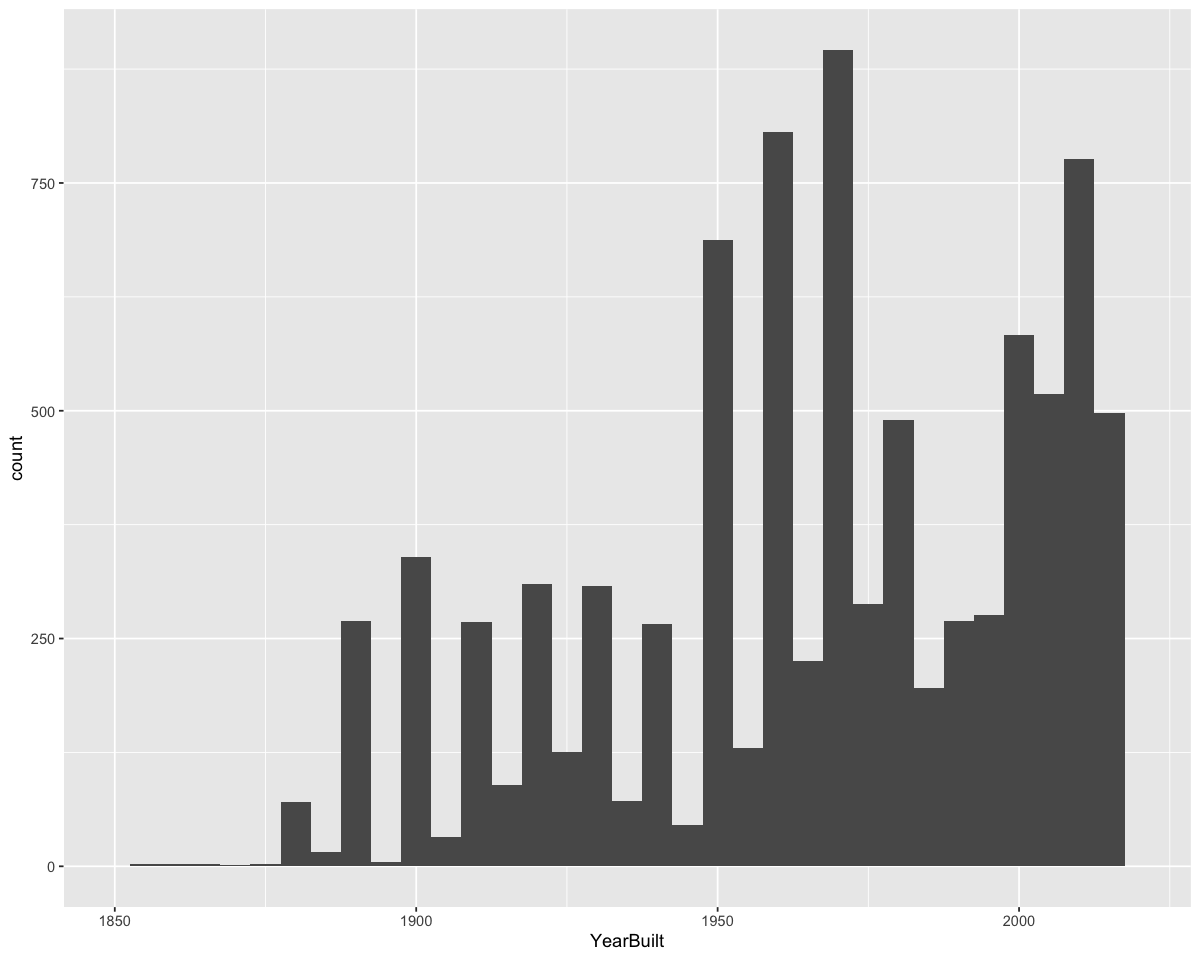

In [20]:
ggplot(data = clean_housing, aes(x= YearBuilt)) + geom_histogram(binwidth = 5) + xlim(1850,2020)

#### As seen from the graph, most of the houses were built between 1950-2010

### What type of the houses are they?
#### h-house or t-townhouse or u-apartment unit

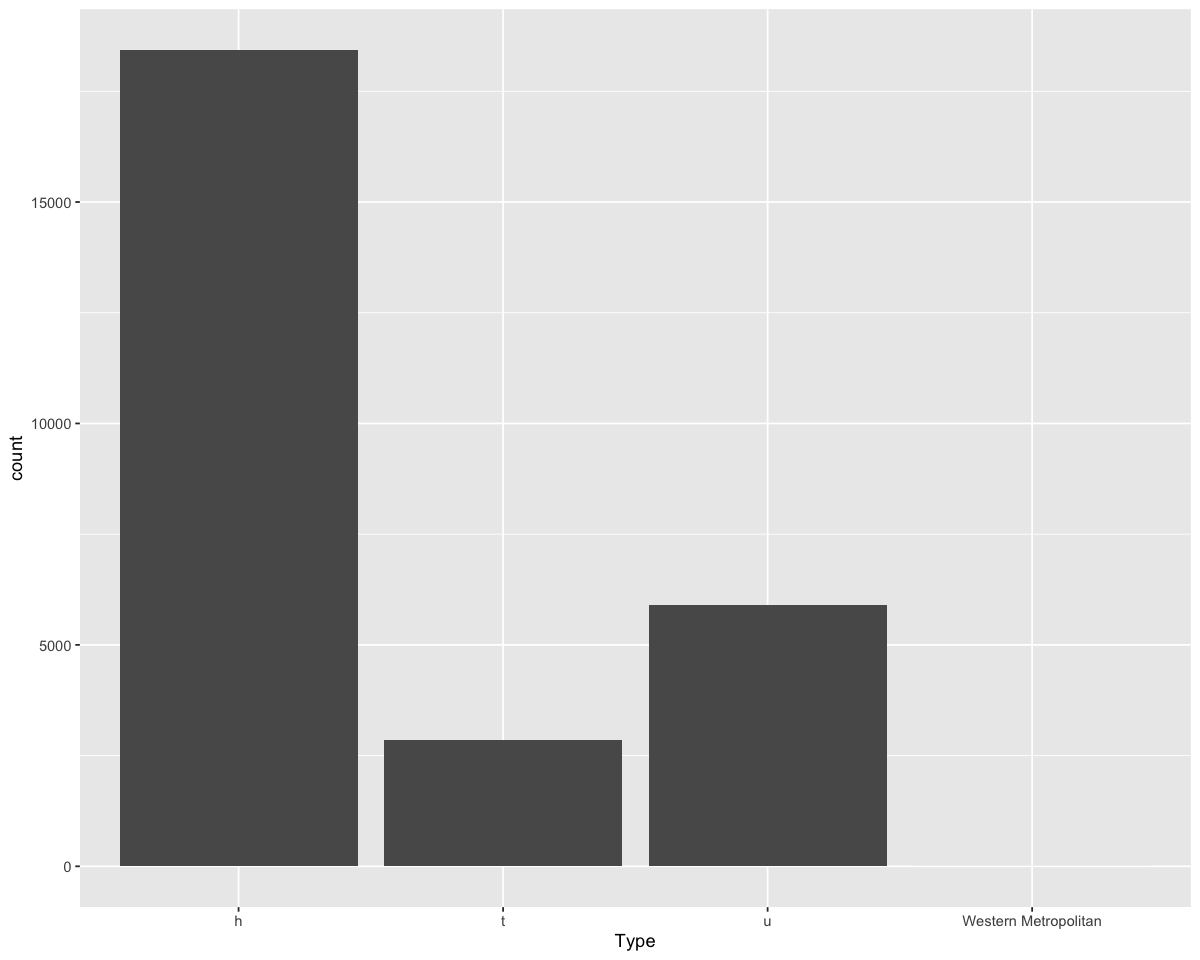

In [9]:
ggplot(data = clean_housing, aes(x=Type)) + geom_bar()

### Let us see where theses houses are located

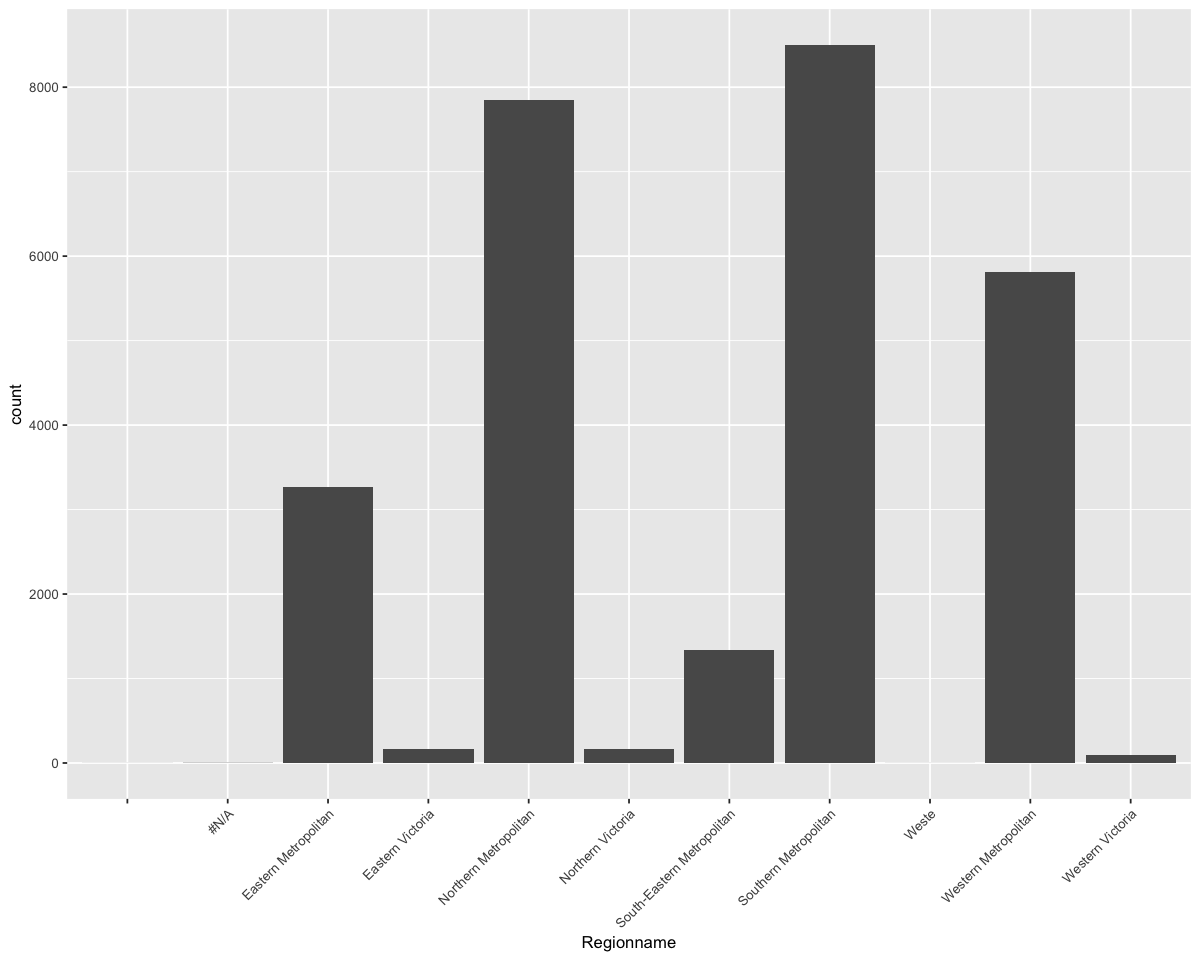

In [10]:
ggplot(data = clean_housing, aes(x = Regionname)) + geom_bar() + theme(text = element_text(size=10), axis.text.x = element_text(angle=45, hjust=1))

### Is there any relationship between price and the region

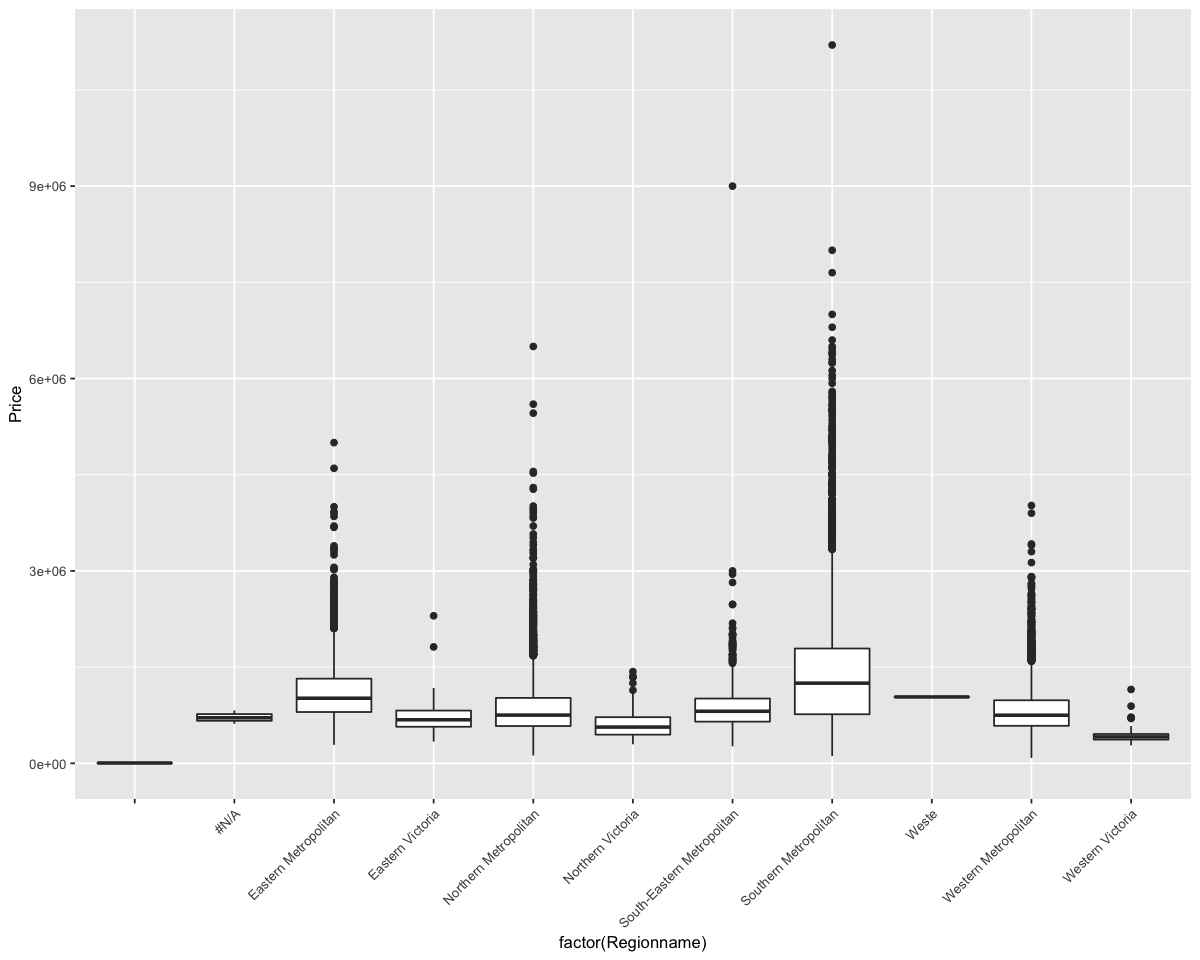

In [11]:
ggplot(data = clean_housing, aes(x = factor(Regionname), y = Price)) + geom_boxplot() + theme(text = element_text(size=10), axis.text.x = element_text(angle=45, hjust=1))

#### From the above box plot, it is evident that houses at Southern Metropolitan is most expensive

### Lets see the price of various type of houses in these region

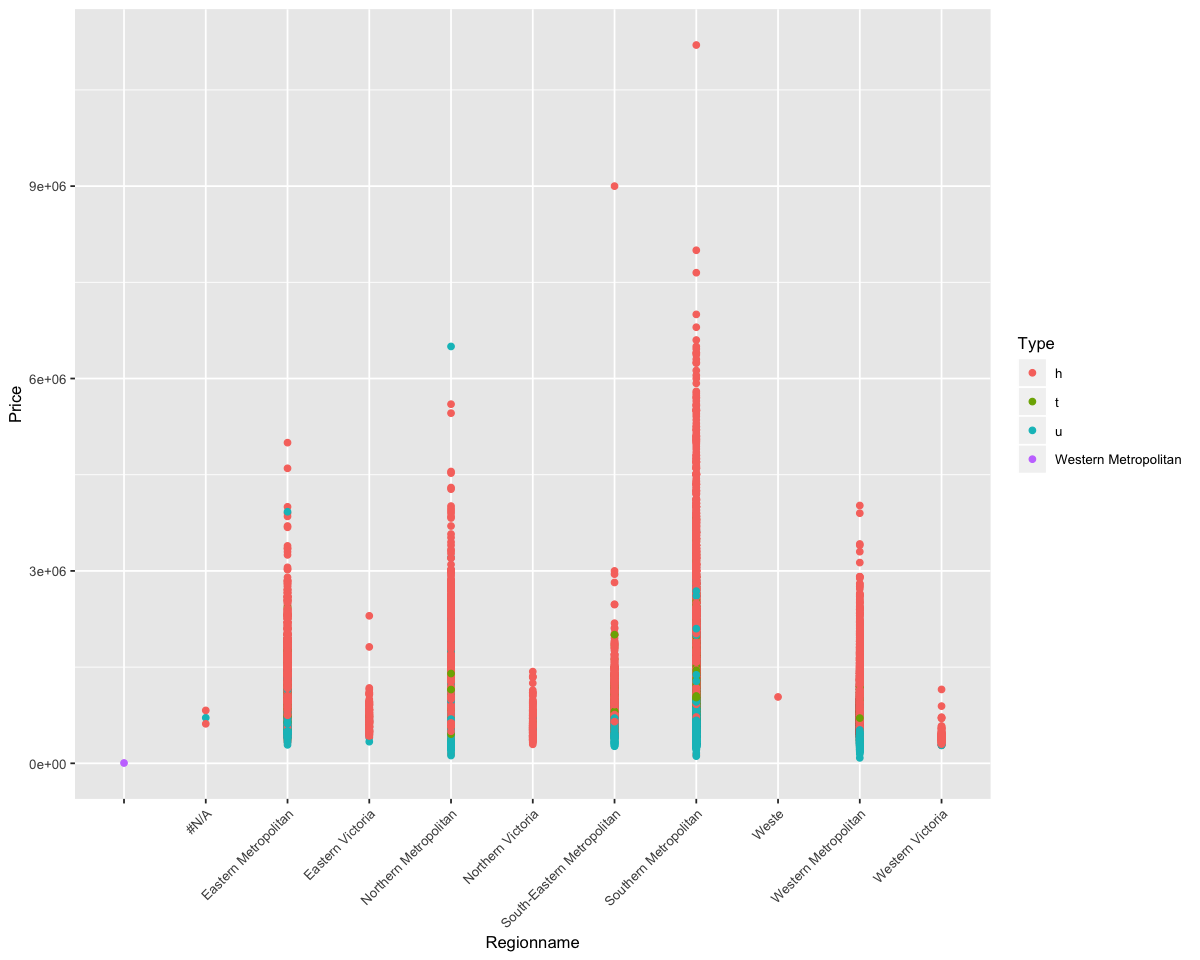

In [12]:
ggplot(data = clean_housing, aes(x = Regionname, y = Price, color = Type)) + geom_point() + theme(text = element_text(size=10), axis.text.x = element_text(angle=45, hjust=1))

### Data Cleaning and its statistics

In [13]:
# omit NA values
clean_housing = na.omit(clean_housing)

dim(clean_housing)
summary(clean_housing)

[1] 8875   21

    Suburb            Address              Rooms            Type          
 Length:8875        Length:8875        Min.   : 1.000   Length:8875       
 Class :character   Class :character   1st Qu.: 2.000   Class :character  
 Mode  :character   Mode  :character   Median : 3.000   Mode  :character  
                                       Mean   : 3.099                     
                                       3rd Qu.: 4.000                     
                                       Max.   :12.000                     
     Price            Method            SellerG              Date          
 Min.   : 131000   Length:8875        Length:8875        Length:8875       
 1st Qu.: 640500   Class :character   Class :character   Class :character  
 Median : 900000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1093091                                                           
 3rd Qu.:1346000                                                           
 Max.   :9000000   

### Let us see how the features are co related to each other

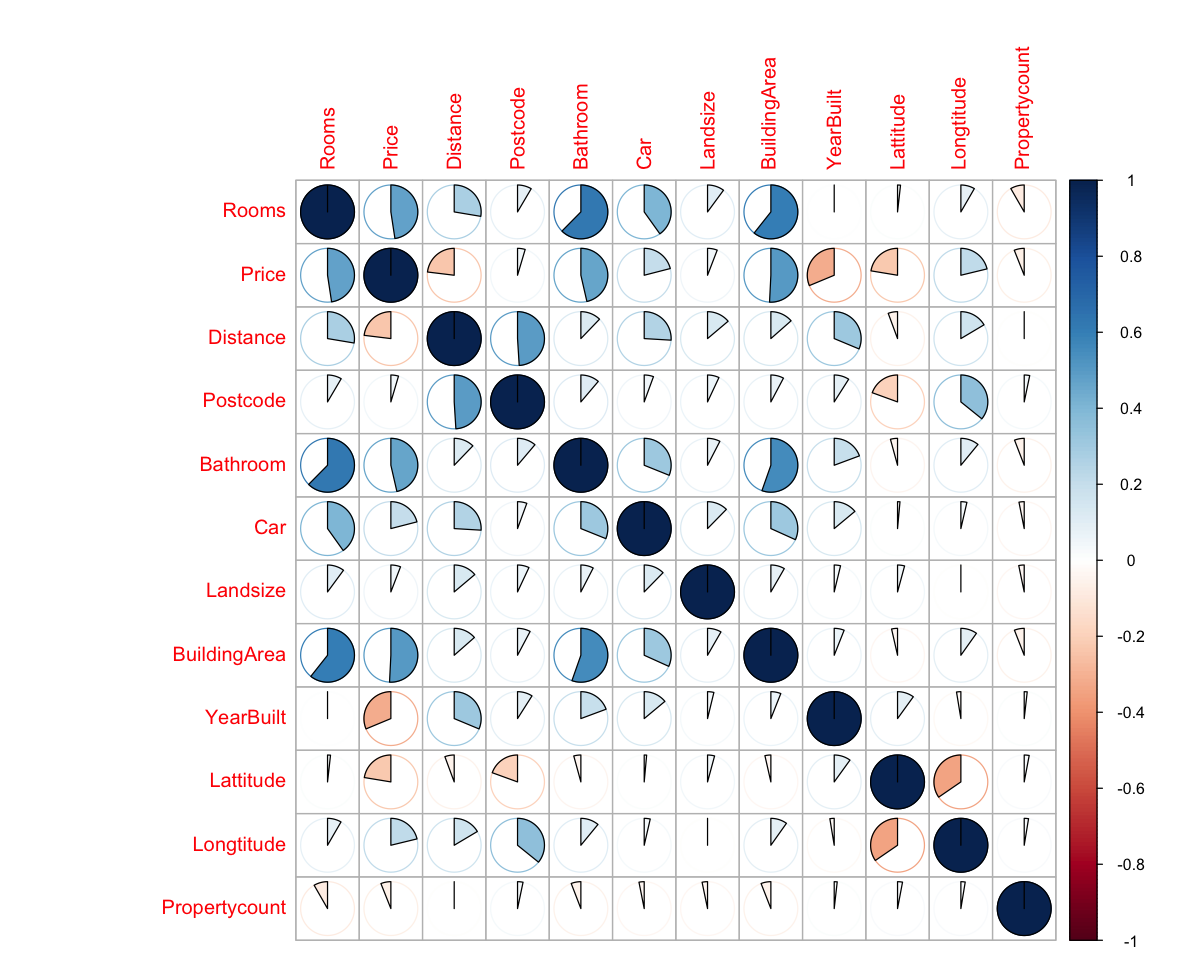

In [14]:
numeric_housing = clean_housing[c(3,5,9:10,12:16,18,19,21)]
numeric_housing <- na.omit(numeric_housing)
housing_corelation = cor(numeric_housing)
corrplot(housing_corelation, method = "pie")

### Split data into training and test subset

In [15]:
#split the data into training and testing data.

set.seed(123)
sample_size = ceiling(nrow(clean_housing) * 0.8)
train_index = sample(nrow(clean_housing), sample_size)

training_data = clean_housing[train_index, ]
test_data = clean_housing[-train_index, ]

### Build the model using training data

In [16]:
model = lm(Price ~ Rooms + Distance  + Bathroom + BuildingArea + YearBuilt + Lattitude + Longtitude , data = training_data)
summary(model)


Call:
lm(formula = Price ~ Rooms + Distance + Bathroom + BuildingArea + 
    YearBuilt + Lattitude + Longtitude, data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3925554  -227546   -48867   146372  8065274 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.428e+08  6.627e+06  -21.55   <2e-16 ***
Rooms         1.665e+05  8.256e+03   20.16   <2e-16 ***
Distance     -3.202e+04  8.782e+02  -36.46   <2e-16 ***
Bathroom      1.894e+05  1.022e+04   18.54   <2e-16 ***
BuildingArea  2.612e+03  8.836e+01   29.56   <2e-16 ***
YearBuilt    -4.713e+03  1.578e+02  -29.86   <2e-16 ***
Lattitude    -1.194e+06  6.280e+04  -19.00   <2e-16 ***
Longtitude    7.395e+05  4.811e+04   15.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 444000 on 7092 degrees of freedom
Multiple R-squared:  0.5856,	Adjusted R-squared:  0.5852 
F-statistic:  1432 on 7 and 7092 DF,  p-value: < 2.2e-16

### The above model seemed to have given the best result in terms of R-squared and F-statistic.
#### The behavior of model with few other feature selection.

<div>
    <img src="https://personal.utdallas.edu/~axa190084/stats_figure.png" width=700 height=500/>
</div>

### Now that the model is ready, let us validate it with test data.

In [17]:
predicted_price = data.frame(predict(model, test_data))

### The mse of the model 

In [18]:
head(predicted_price)
mse(test_data$Price, predicted_price$predict.model..test_data.)

,predict.model..test_data.
,<dbl>
45,1243353.0
51,1067350.3
54,879789.3
57,651537.0
68,142790.9
69,130393.0


[1] 195801339104

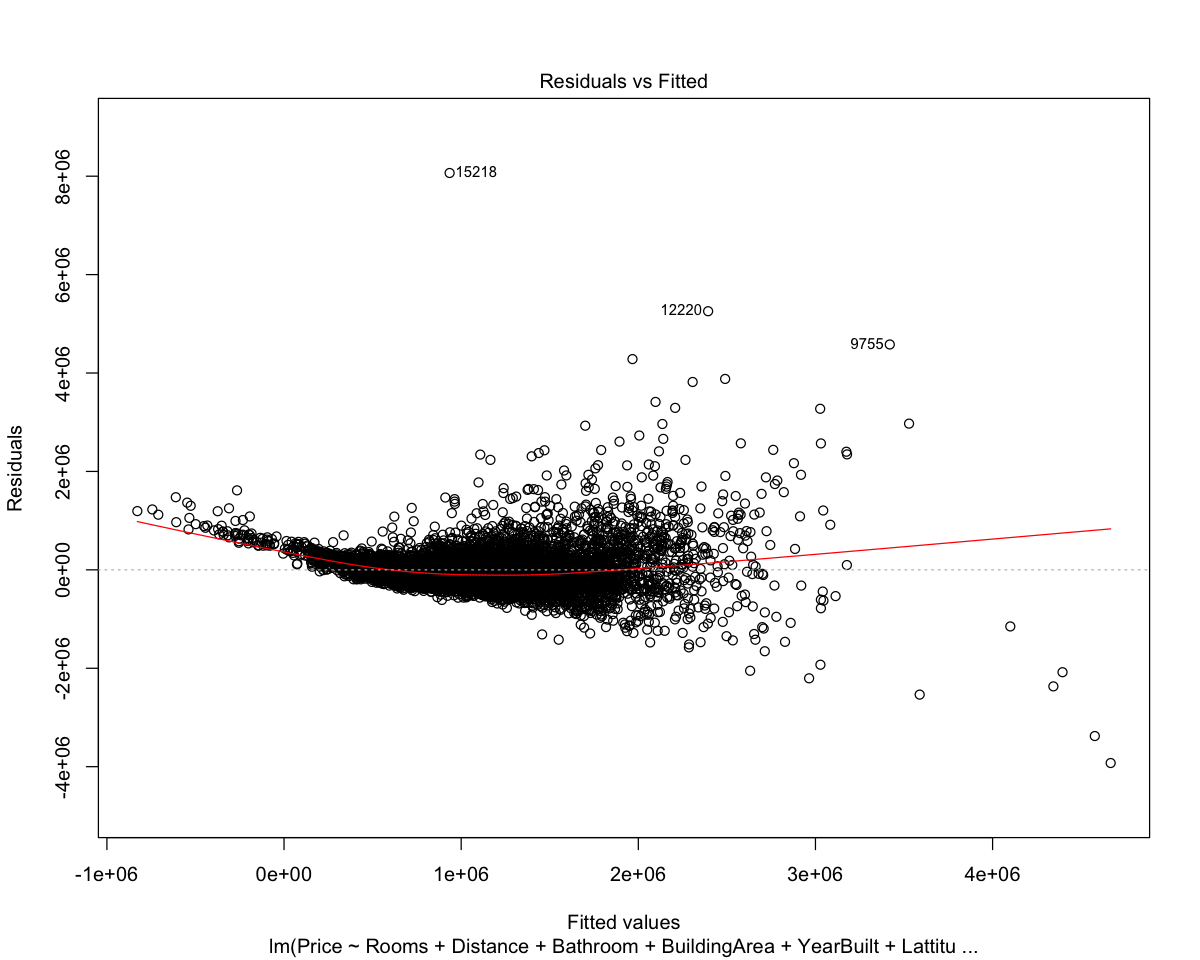

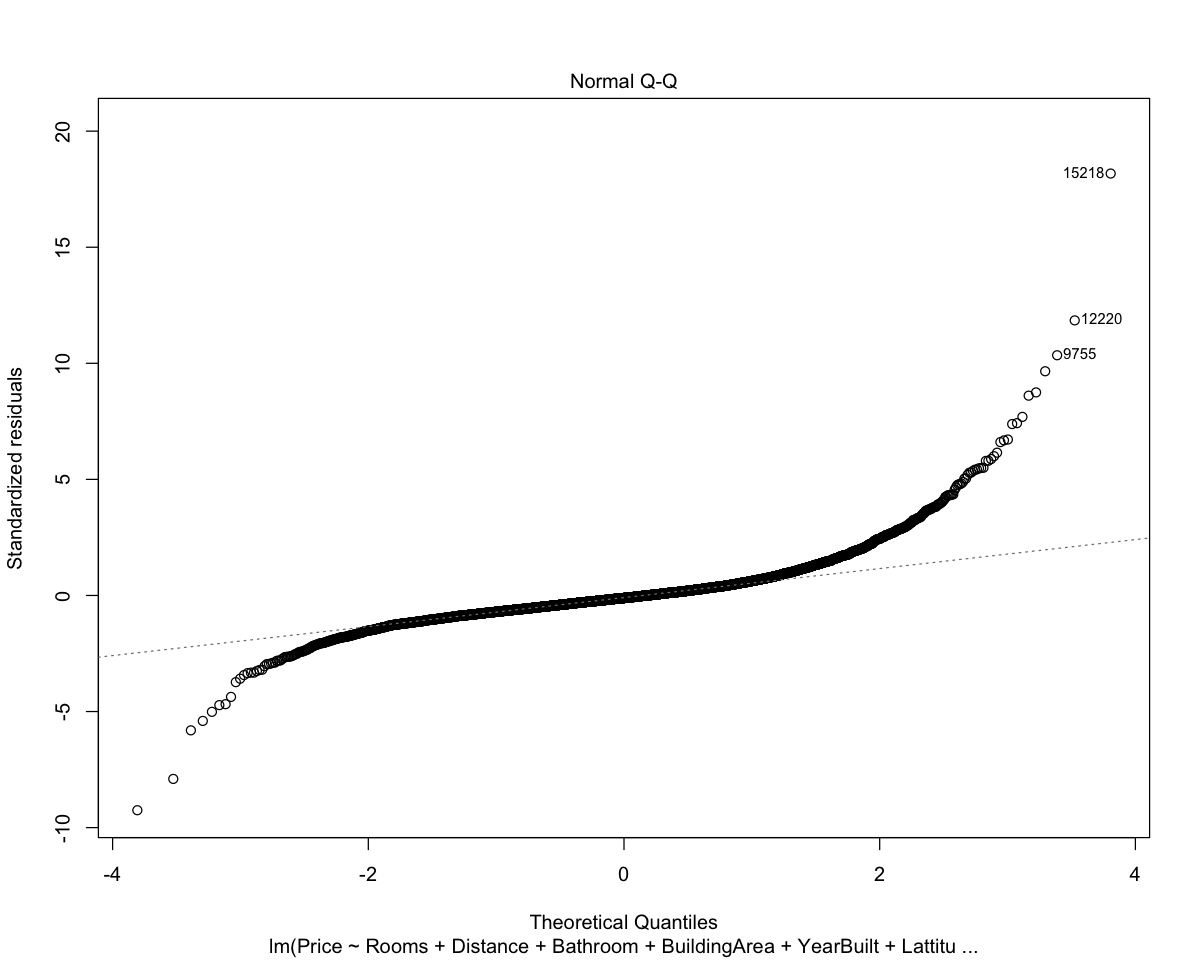

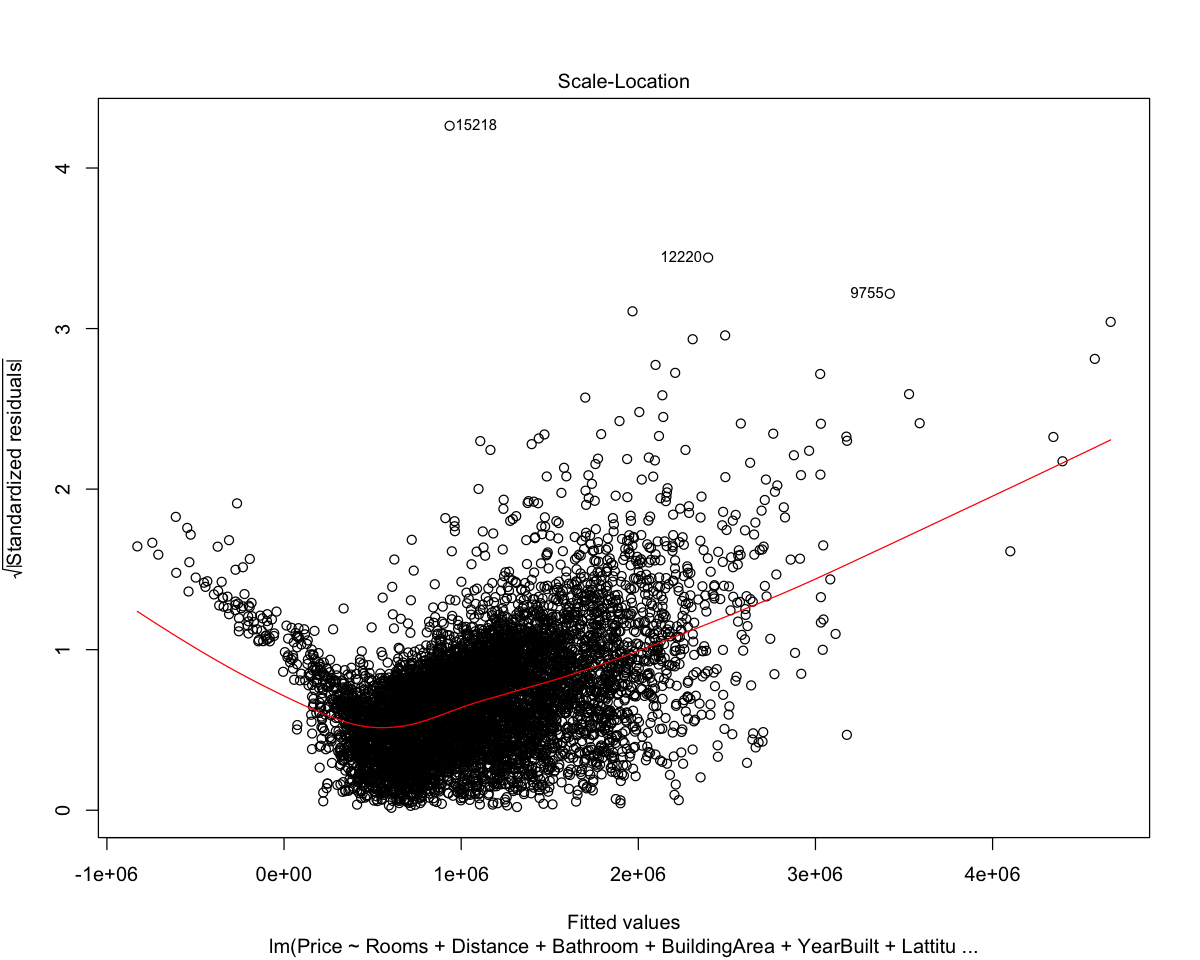

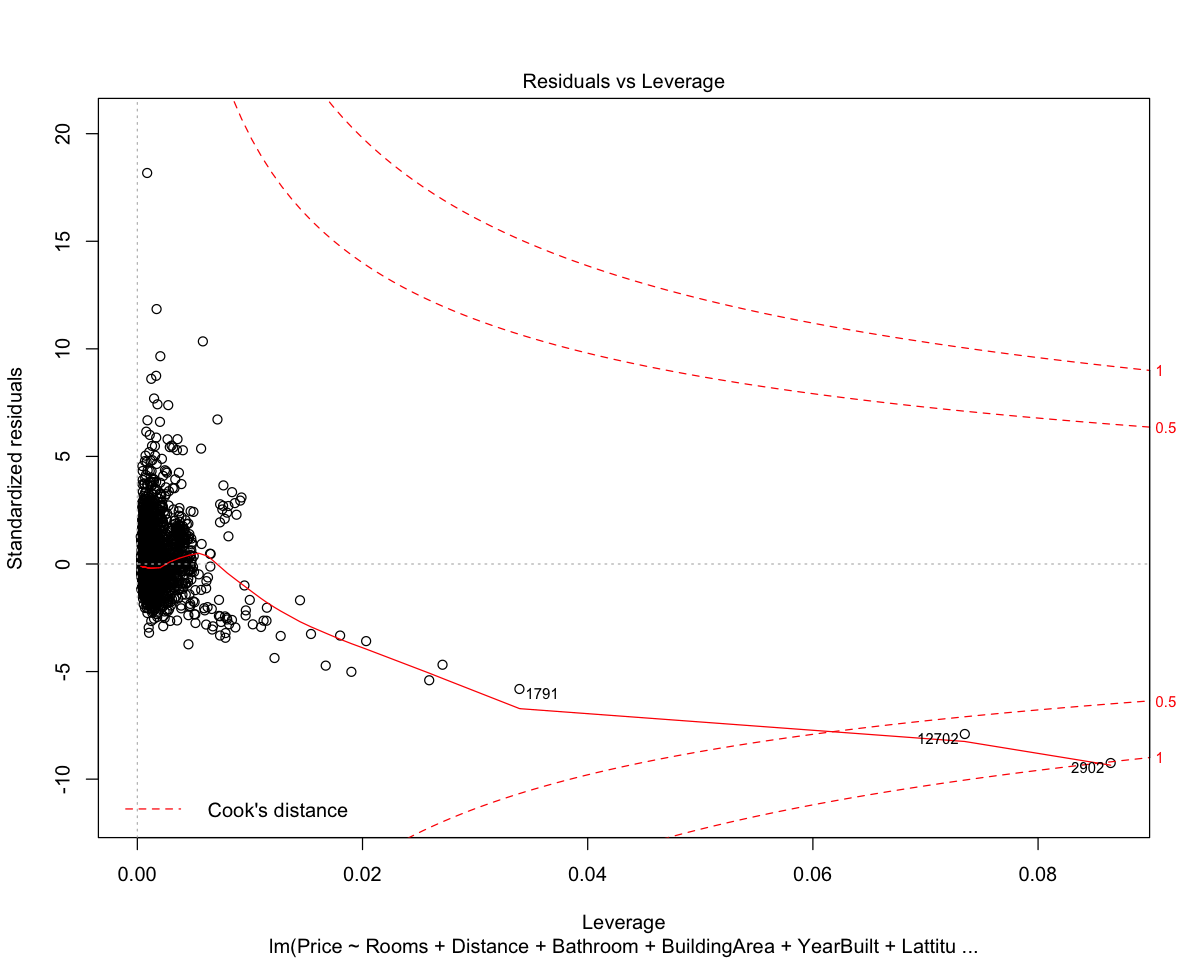

In [19]:
plot(model)